<a href="https://colab.research.google.com/github/rakshithcode/FaceMaskDetection/blob/main/FaceMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the face mask dataset


In [2]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 128M/163M [00:00<00:00, 1.33GB/s]
100% 163M/163M [00:00<00:00, 1.22GB/s]


In [3]:
#extracting the compessed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5])

['with_mask_1550.jpg', 'with_mask_2281.jpg', 'with_mask_2292.jpg', 'with_mask_2441.jpg', 'with_mask_2864.jpg']
with_mask_3431.jpg


In [7]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5])

['without_mask_3284.jpg', 'without_mask_3411.jpg', 'without_mask_2859.jpg', 'without_mask_1078.jpg', 'without_mask_1375.jpg']
without_mask_2263.jpg


In [8]:
print('Number of images with mask:',len(with_mask_files))
print('Number of images without mask:',len(without_mask_files))

Number of images with mask: 3725
Number of images without mask: 3828


Creating labels for the two class of images
with mask --> 1
without mask --> 0

In [9]:
#create the labels
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [10]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images


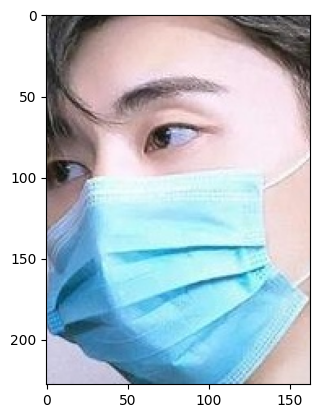

In [17]:
#displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot=plt.imshow(img)
plt.show()

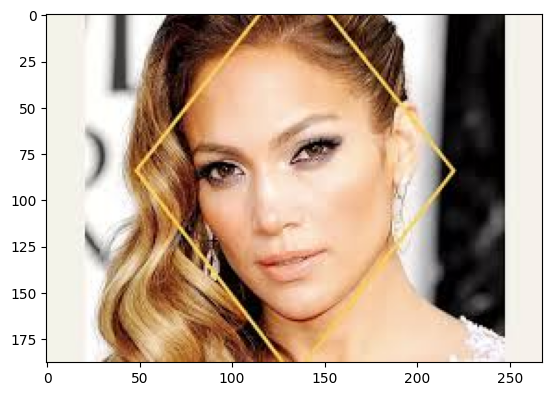

In [18]:
#displaying without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_2929.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing
resize the images
convert the images to numpy arrays

In [19]:
#convert images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[ 98,  93,  89],
        [100,  95,  90],
        [101,  96,  90],
        ...,
        [ 91,  86,  80],
        [ 91,  86,  80],
        [ 89,  84,  78]],

       [[ 97,  92,  88],
        [102,  97,  92],
        [ 97,  92,  86],
        ...,
        [ 89,  84,  78],
        [ 89,  84,  78],
        [ 87,  82,  76]],

       [[ 98,  93,  89],
        [ 98,  93,  88],
        [ 97,  92,  86],
        ...,
        [ 88,  83,  77],
        [ 87,  82,  76],
        [ 87,  82,  76]],

       ...,

       [[ 58,  66,  86],
        [ 52,  59,  78],
        [ 47,  54,  70],
        ...,
        [222, 177, 150],
        [218, 172, 148],
        [204, 158, 137]],

       [[ 50,  60,  75],
        [ 45,  54,  68],
        [ 42,  50,  63],
        ...,
        [215, 171, 145],
        [209, 164, 140],
        [193, 148, 127]],

       [[ 52,  62,  75],
        [ 44,  53,  65],
        [ 41,  49,  60],
        ...,
        [210, 166, 140],
        [200, 155, 131],
        [177, 134, 114]]], dtype=uint8)
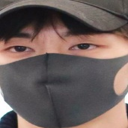

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
#converting image list and label list to numpy arrays
X=np.array(data)
Y=np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


Train test split

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [31]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[253, 240, 245],
        [254, 248, 247],
        [251, 255, 247],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 254, 237],
        [210, 238, 202],
        [158, 205, 151],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[232, 255, 227],
        [152, 211, 147],
        [ 27, 119,  21],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 16,  15,  21],
        [ 14,  13,  19],
        [ 16,  15,  21]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 14,  13,  19],
        [ 13,  12,  18],
        [ 12,  11,  17]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 13,  12,  18],
        [ 11,  10,  16],
        [ 10,   9,  15]]], dtype=uint8)
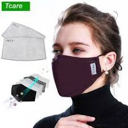

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[0.99215686, 0.94117647, 0.96078431],
        [0.99607843, 0.97254902, 0.96862745],
        [0.98431373, 1.        , 0.96862745],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.96078431, 0.99607843, 0.92941176],
        [0.82352941, 0.93333333, 0.79215686],
        [0.61960784, 0.80392157, 0.59215686],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.90980392, 1.        , 0.89019608],
        [0.59607843, 0.82745098, 0.57647059],
        [0.10588235, 0.46666667, 0.08235294],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

Building a convolutional Neural networks(CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [38]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [40]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.6410 - loss: 0.7199 - val_acc: 0.8826 - val_loss: 0.2939
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - acc: 0.8722 - loss: 0.3119 - val_acc: 0.8463 - val_loss: 0.3514
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9070 - loss: 0.2532 - val_acc: 0.9207 - val_loss: 0.2487
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9252 - loss: 0.2026 - val_acc: 0.9107 - val_loss: 0.2802
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9379 - loss: 0.1807 - val_acc: 0.9174 - val_loss: 0.2884


Model evaluation

In [41]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9181 - loss: 0.2613
Test Accuracy = 0.9172733426094055


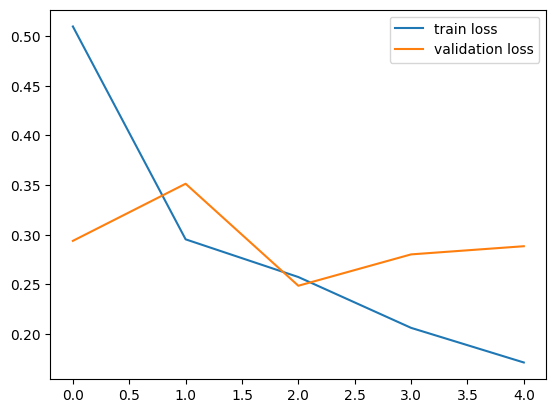

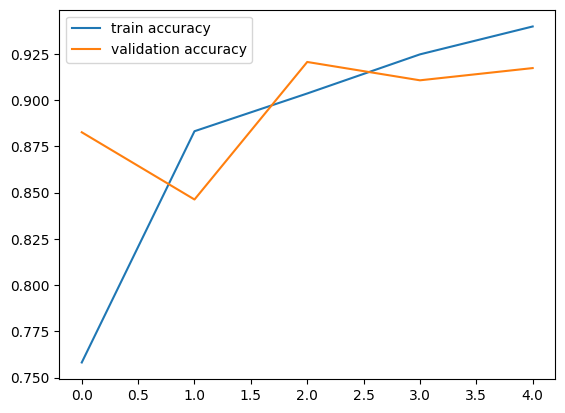

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive system

Path of the image to be predicted: /content/images (1).jpeg


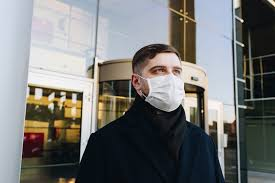

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.09135996 0.98335373]]
1
The person in the image is wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/withoutmask.webp


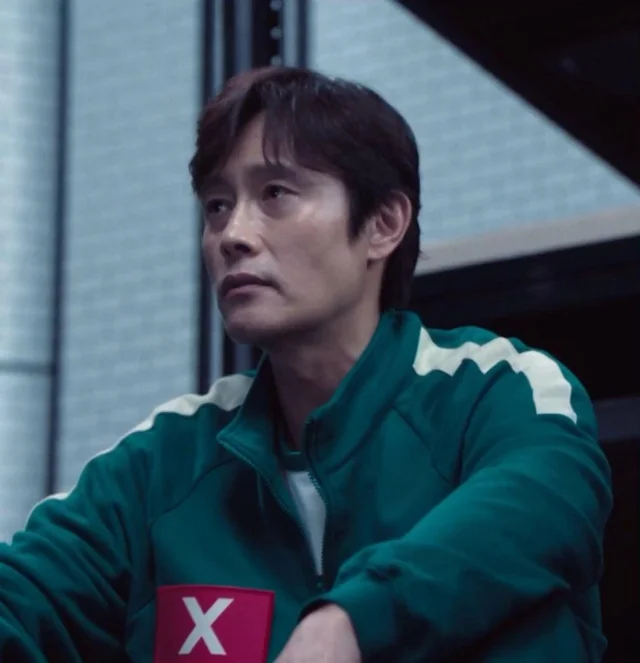

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.47837833 0.43311232]]
0
The person in the image is not wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')